In [24]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import pandas as pd
import gensim.downloader as api

In [2]:
#[IQ,CGPA,DSA problems solved]
inputs = [[91, 9.2, 62],[82, 8.6, 30],[95, 7.5, 100],[50, 7.0, 120]]

In [3]:
#[SALARY in LPA]
output = [12, 6, 13, 15,]

In [4]:
#random weigts between 0-1
weights = [rd.random(),rd.random(),rd.random()]
weights

[0.5315689872553279, 0.30238653947540495, 0.09082221528945711]

In [5]:
bias = 2 #random

In [25]:
words = pd.read_csv("words.csv")
words = words.sample(frac=1).reset_index(drop=True)

In [26]:
model = api.load("word2vec-google-news-300")

In [27]:
def apply_embeddings(word):
    if word in model.key_to_index:
        return model[word][:5]
    else:
        return None

In [28]:
words["embeddings"] = words["word"].apply(apply_embeddings)

In [29]:
words.dropna(inplace=True)

In [30]:
words_int = pd.DataFrame(words["embeddings"].tolist(), index=words.index)
words_int.columns = [f'{i}' for i in range(words_int.shape[1])]
words = words.drop(columns=["embeddings"]).join(words_int)
words

,word,label,0,1,2,3,4
0,terrible,0,0.164062,0.192383,0.092285,0.130859,0.075195
1,careless,0,0.449219,0.191406,-0.036865,0.054932,-0.253906
2,shabby,0,0.091797,0.339844,0.060791,0.174805,0.002853
3,barren,0,0.158203,0.355469,0.049072,0.001335,-0.061035
4,distressed,0,0.125977,0.333984,-0.015991,-0.094238,-0.048340
...,...,...,...,...,...,...,...
392,phenomenal,1,0.133789,0.111816,-0.181641,0.059082,0.023438
393,defiant,0,0.294922,0.246094,0.120117,-0.063965,-0.022827
394,victorious,1,0.069824,0.218750,0.248047,-0.226562,0.263672
395,invincible,1,0.231445,0.376953,0.181641,-0.155273,-0.228516


In [31]:
train_words = words[:320]
test_words = words[320:]

In [164]:
train_input = train_words.drop(columns=["word", "label"]).values.tolist()
test_input = test_words.drop(columns=["word", "label"]).values.tolist()

### Batched NN forward propagation

In [6]:
predicted = [inputs[0][0]*weights[0]+inputs[0][1]*weights[1]+inputs[0][2]*weights[2] + bias,
            inputs[1][0]*weights[0]+inputs[1][1]*weights[1]+inputs[1][2]*weights[2] + bias,
            inputs[2][0]*weights[0]+inputs[2][1]*weights[1]+inputs[2][2]*weights[2] + bias,
            inputs[3][0]*weights[0]+inputs[3][1]*weights[1]+inputs[3][2]*weights[2] + bias]

In [7]:
predicted

[58.7857113513549, 50.91384765310909, 63.84917436426739, 41.59382097382908]

In [8]:
loss = np.array(predicted) - np.array(output)
loss

array([46.78571135, 44.91384765, 50.84917436, 26.59382097])

In [9]:
average_loss = np.mean(loss)
average_loss

42.285638585640115

In [159]:
output = words["label"]
train_output = output[:320]
test_output = output[320:]

In [33]:
def one_hot(l):
    arr = l
    encoded_arr = np.zeros((arr.size, arr.max()+1), dtype=int)
    encoded_arr[np.arange(arr.size),arr] = 1
    return encoded_arr

In [53]:
def softmax(l):
    npl = np.array(l)
    sm = np.exp(npl - np.max(npl, axis=0, keepdims=True))
    probs = sm / np.sum(sm, axis=0, keepdims=True)
    return probs

In [163]:
one_hot_train_output = one_hot(train_output)

### Single input forward propagation

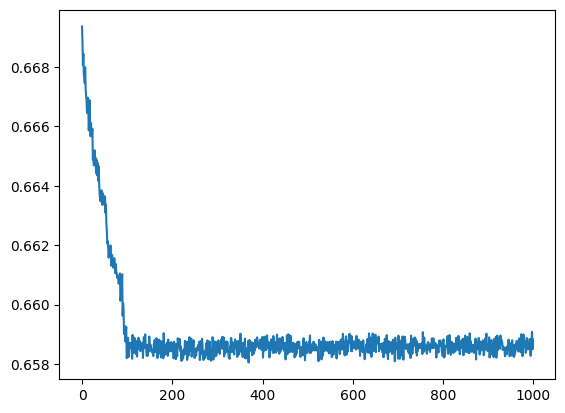

In [174]:
weights1 = [rd.random(), rd.random(), rd.random(), rd.random(), rd.random()]
weights2 = [rd.random(), rd.random(), rd.random(), rd.random(), rd.random()]
bias1 = 2
bias2 = 2
best_weights_1 = list(weights1)
best_weights_2 = list(weights2)
best_bias_1 = bias1
best_bias_2 = bias2
predicted = []
lowest_loss = 9999999
learning_rate = 0.02

all_losses = []
lowest_losses = []

# multiplied by 0.05 to make the weights small
for i in range(1000):
    weights1[0] -= learning_rate * rd.random()
    weights1[1] -= learning_rate * rd.random()
    weights1[2] -= learning_rate * rd.random()
    weights1[3] -= learning_rate * rd.random()
    weights1[4] -= learning_rate * rd.random()

    weights2[0] -= learning_rate * rd.random()
    weights2[1] -= learning_rate * rd.random()
    weights2[2] -= learning_rate * rd.random()
    weights2[3] -= learning_rate * rd.random()
    weights2[4] -= learning_rate * rd.random()
    
    bias1 -= learning_rate * rd.random()
    bias2 -= learning_rate * rd.random()

    #clipping the weights if they go below zero
    weights1[0] = max(0, weights1[0])
    weights1[1] = max(0, weights1[1])
    weights1[2] = max(0, weights1[2])
    weights1[3] = max(0, weights1[3])
    weights1[4] = max(0, weights1[4])

    weights2[0] = max(0, weights2[0])
    weights2[1] = max(0, weights2[1])
    weights2[2] = max(0, weights2[2])
    weights2[3] = max(0, weights2[3])
    weights2[4] = max(0, weights2[4])
    
    for j in train_input:
        l = [max(0, j[0]*weights1[0]+j[1]*weights1[1]+j[2]*weights1[2]+j[3]*weights1[3]+j[4]*weights1[4]+ bias1), 
            max(0, j[0]*weights2[0]+j[1]*weights2[1]+j[2]*weights2[2]+j[3]*weights2[3]+j[4]*weights2[4]+ bias2)]

        predicted.append(softmax(l))

    correct_confidences = np.sum(predicted * one_hot_train_output, axis=1)
    loss = np.mean(-np.log(correct_confidences))
    
    predicted = []
    all_losses.append(loss)
    
    if loss<lowest_loss:
        lowest_losses.append(loss)
        lowest_loss= loss
        best_weights_1 = list(weights1)
        best_weights_2 = list(weights2)
        best_bias_1 = bias1
        best_bias_2 = bias2
    else:
        weights1 = list(best_weights_1)
        weights2 = list(best_weights_2)
        bias1 = best_bias_1
        bias2 = best_bias_2

plt.plot(range(len(all_losses)), all_losses)

In [11]:
test_input = [[91, 9.2, 62],[82, 8.6, 30],[95, 7.5, 100],[50, 7.0, 120]]

In [12]:
test_predicted = [inputs[0][0]*weights[0]+inputs[0][1]*weights[1]+inputs[0][2]*weights[2] + bias,
            inputs[1][0]*weights[0]+inputs[1][1]*weights[1]+inputs[1][2]*weights[2] + bias,
            inputs[2][0]*weights[0]+inputs[2][1]*weights[1]+inputs[2][2]*weights[2] + bias,
            inputs[3][0]*weights[0]+inputs[3][1]*weights[1]+inputs[3][2]*weights[2] + bias]

In [167]:
def predicted_output(test):
    test_predicted = []
    for i in range(len(test)):
        s1 = 0
        s2 = 0
        for j in range(5):
            s1 += test[i][j] * best_weights_1[j]
            s2 += test[i][j] * best_weights_2[j]
        s1 += best_bias_1
        s2 += best_bias_2
        if s1>s2: test_predicted.append([0,1])
        else: test_predicted.append([1,0])
    return test_predicted

predicted_res = predicted_output(test_input)

one_hot_test_output = one_hot(test_output)
one_hot_test_output = one_hot_test_output.tolist()

correct_samples = 0

for i in range(len(test_output)):
    if predicted_res[i] == one_hot_test_output[i]:
        correct_samples += 1
    else: 
        pass

accuracy = correct_samples / len(test_output)
print("Accuracy: ", accuracy * 100)

Accuracy:  44.73684210526316
